<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_61%EC%9D%BC%EC%B0%A8_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

In [ ]:
import torch
import torch.nn as nn
from torch import nn

In [ ]:
input_data = torch.randn(1,1,28,28) # batch size 1 단일채널 2828 크기

In [ ]:
conv= nn.Conv2d(in_channels=1, out_channels=16,kernel_size=3 ,stride=2,padding=1) # 2차원평면성 콘볼루션 레이어
# in_channels=1 은 위에서 단일채널설정 out-channels는 여기서 임의적 출력설정
# kernel_size= 3은 filter 3*3
output = conv(input_data)
#  콘볼루션 적용

print(output.shape)

torch.Size([1, 16, 14, 14])


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

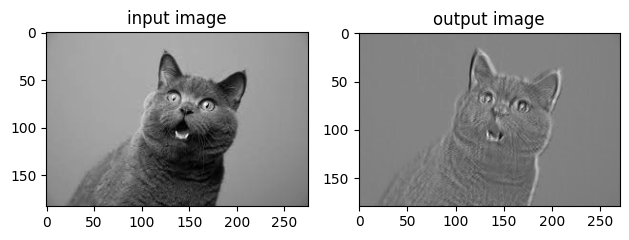

In [ ]:
image_path = "/content/surprised_cat.jpg"
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

input_data = transforms.ToTensor()(image_gray).unsqueeze(0)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, dilation=2)

output = conv(input_data)

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("input image")

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze().detach().numpy(), cmap='gray')
plt.title("output image")

plt.tight_layout()
plt.show()


# 완전 연결 레이어 종류

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
input_size =4
output_size = 2
# 입력 크기 4 , 출력크기 2 (임의 지정)

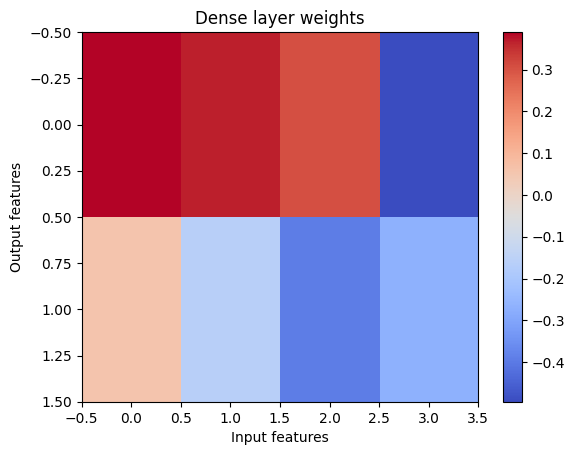

In [ ]:

input_size = 4
output_size = 2

dense_layer = nn.Linear(input_size, output_size)
weights = dense_layer.weight.data.numpy()

plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.xlabel("Input features")  # 4 input featuresㅛ
plt.ylabel("Output features")  # 2 output features
plt.title("Dense layer weights")
plt.colorbar()
plt.show()

## Optimizer 종류

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__() # 상위클래스 상속
    self.conv1 = nn.Conv2d(1,16,kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc2 = nn.Conv2d(16,32, kernel_size=3, stride=1, padding=1)
    self.fc = nn.Linear(32*7*7,10)
    # self.conv2를 거친 특징값 행렬ㅇ리 32채널 7*7행렬로 나오는 예시이므로
    # 마지막 완전연결층 입력값이 32*7*7이 되버림
# 순전파
  def forward(self,x):
    x = self.conv1(x)
    # 첫번째 합성곱층 통과
    x = self.relu(x)
    # 활성화함수 이용
    x = self.pool(x)
    # 풀링 풀링 다음에는 활성함수 다시 먹이지 x

    # 풀링 다음에는 활성함수를 다시 먹이지 않음
    x = self.conv2(x)
    x = self.relu(x)
    x= self.pool(x)
    x = self.fc(x)
    return x
    # 출력층이라서 활성함수 들어가지 x

# conv1 활성곱층 relu 활성화함수 pool 풀링레이어 fc 출력층

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt


In [ ]:
# 연산을 gpu 처리로 없으면 cpu
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(32 * 7 * 7, 10)  # 수정: 출력 뉴런 개수를 10으로 설정

            # 28*28 이미지가
     # 입력, 출력 하이퍼파라미터 설계자지정 출력층은16
    '''
    입력채널 1-> 흑백이미지
    출력채널 16  -> 설계자 임의 결정
    '''
           # 2x2 커널이 보통사용되는 값  # 14*14로
      # pool층 다음엔 활성화함수 x
    # conv1의 출력이 입력이됨 출력 32도 설계자 임의
    '''
      입력채널 16-> 상기합성층의 출력채널수
    출력채널 32  -> 설계자 임의 결정
    '''
    '''
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc = nn.Linear(32*7*7, 10) # 14의 절반 7*7이됨
    '''
    '''
    32 -> 상기 합성층의 출력 채널 수
    7*7 -> 상기 풀링 거친 특징값 행렬의 크기

    '''

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  # 수정: 평탄화 (Flatten) 작업

        x = self.fc(x)
        return x

'''
위처럼 클래스정의하고
데이터셋불러오고 데이터로더 만들고
모델에 올리면서 loss, optimizer적용 forward 걸면서 앞으로진행
'''

if __name__ =="__main__":
  train_dataset = MNIST('/content/',train=True, transform=transforms.ToTensor(), download=True)
  test_dataset = MNIST('/content/',train=False, transform=transforms.ToTensor())


  batch_size = 64
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size)


  model = CNN()# 모델을 적절한 장치에 넘김 .to(deivce)

  #손실함수:다중클래스 비교는 보통 크로스엔트로피
  criterion = nn.CrossEntropyLoss()
  # 다중 클래스 분류 문제이므로 , Cross Entropy 손실 함수 사용
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  # lr 초기값은 설계자 임의 지정

  num_epochs = 10

  for epoch in range(num_epochs):
    model.train()
    # 모델을 학습 모드로 설정
    running_loss = 0.0
    # 트레인 로더를 한번 순회한 오차값

    for images, labels in train_loader:
      images = images.to(device)
      labels = labels.to(device)
      # loader 받아온  image와 label을 적절한 장치 넘김

      optimizer.zero_grad() # 그레디언트 초기화

      outputs =model(images)
      # 모델에 받아온 images를 입력 후 예측값인 otputt를 받아옴

      loss = criterion(outputs,labels)
      #예측값 outputs , 실제값 labels 차이 loss

      loss.backward()
      optimizer.step()
      # 역전파 이후 optimizer가 가중치 업데이트
      running_loss += loss.item()*images.size(0)

    epoch_loss = running_loss/len(train_dataset)
    print(f"Epoch{epoch+1}/{num_epochs}, loss : {epoch_loss:.4f}")






Epoch1/10, loss : 0.2428
Epoch2/10, loss : 0.0705
Epoch3/10, loss : 0.0515
Epoch4/10, loss : 0.0410
Epoch5/10, loss : 0.0358
Epoch6/10, loss : 0.0293
Epoch7/10, loss : 0.0253
Epoch8/10, loss : 0.0224
Epoch9/10, loss : 0.0191
Epoch10/10, loss : 0.0175


## 이하 모델 평가 코드

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
      images = images.to(device)
      labels = labels.to(device)
      # loader 받아온  image와 label을 적절한 장치 넘김

      outputs =model(images)
      # outputs가 10개의 확률함수로 나타남
      # outputs에 나타난 10개 중 가장 높은 값을 취함 ->모델이 예측한 숫자
      _ , predicted = torch.max(outputs.data, 1)
      # 출력 튜플의 두번깩밧 predicted 모델이 예측한 라벨
      total += labels.size(0)
      #이번 test loader 에 올라온 label의 숫자를 총 숫자에 합산함
      correct += (predicted == labels).sum().item()
      # predicted와 labels 둘다 일정 갯수의 행렬 형태로 나올 것
      # (predicted == labels) 같은 값은 행렬내 1 아니면 0 [1.,0.,1 ... ]
      # 위에서 얻은 1,0 으로 이루어진 행렬의 합을 구함 -> sum()


accuracy = (correct/ total) *100
print(f"test Accuray{accuracy:.2f}%")




test Accuray99.51%
